<a href="https://colab.research.google.com/github/S-AILAB/Predicting-Diabetes-using-Logistic-Regression/blob/main/Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic Regression

**Objective:**
The goal is to Build the Logistic Regression model.

**Problem Statement:**
The task is to build a Logistic Regression model to predict whether an individual has diabetes based on the provided features.



###Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


###Loading dataset

In [ ]:
df = pd.read_csv('/content/Diabetes.csv')

###Data Pre-Processing

Data Inspection and Summary Statistics

In [ ]:
df.head()

Number of times pregnant   Plasma glucose concentration  \
0                          6                            148   
1                          1                             85   
2                          8                            183   
3                          1                             89   
4                          0                            137   

    Diastolic blood pressure   Triceps skin fold thickness  \
0                         72                            35   
1                         66                            29   
2                         64                             0   
3                         66                            23   
4                         40                            35   

    2-Hour serum insulin   Body mass index   Diabetes pedigree function  \
0                      0              33.6                        0.627   
1                      0              26.6                        0.351   
2                      0              23.3                        0.672   
3                     94              28.1                        0.167   
4                    168              43.1                        2.288   

    Age (years) Outcome  
0            50     YES  
1            31      NO  
2            32     YES  
3            21      NO  
4            33     YES

In [ ]:
df.tail()

Number of times pregnant   Plasma glucose concentration  \
763                         10                            101   
764                          2                            122   
765                          5                            121   
766                          1                            126   
767                          1                             93   

      Diastolic blood pressure   Triceps skin fold thickness  \
763                         76                            48   
764                         70                            27   
765                         72                            23   
766                         60                             0   
767                         70                            31   

      2-Hour serum insulin   Body mass index   Diabetes pedigree function  \
763                    180              32.9                        0.171   
764                      0              36.8                        0.340   
765                    112              26.2                        0.245   
766                      0              30.1                        0.349   
767                      0              30.4                        0.315   

      Age (years) Outcome  
763            63      NO  
764            27      NO  
765            30      NO  
766            47     YES  
767            23      NO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Outcome                        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.size

6912

In [ ]:
df.describe()

Number of times pregnant  Plasma glucose concentration  \
count                768.000000                    768.000000   
mean                   3.845052                    120.894531   
std                    3.369578                     31.972618   
min                    0.000000                      0.000000   
25%                    1.000000                     99.000000   
50%                    3.000000                    117.000000   
75%                    6.000000                    140.250000   
max                   17.000000                    199.000000   

       Diastolic blood pressure  Triceps skin fold thickness  \
count                768.000000                   768.000000   
mean                  69.105469                    20.536458   
std                   19.355807                    15.952218   
min                    0.000000                     0.000000   
25%                   62.000000                     0.000000   
50%                   72.000000                    23.000000   
75%                   80.000000                    32.000000   
max                  122.000000                    99.000000   

       2-Hour serum insulin  Body mass index  Diabetes pedigree function  \
count            768.000000       768.000000                  768.000000   
mean              79.799479        31.992578                    0.471876   
std              115.244002         7.884160                    0.331329   
min                0.000000         0.000000                    0.078000   
25%                0.000000        27.300000                    0.243750   
50%               30.500000        32.000000                    0.372500   
75%              127.250000        36.600000                    0.626250   
max              846.000000        67.100000                    2.420000   

       Age (years)  
count   768.000000  
mean     33.240885  
std      11.760232  
min      21.000000  
25%      24.000000  
50%      29.000000  
75%      41.000000  
max      81.000000

In [ ]:
df.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', 'Outcome'],
      dtype='object')

In [ ]:
df = df.rename(columns={' Number of times pregnant': 'Pregnancies',
                   ' Plasma glucose concentration': 'Glucose',
                   ' Diastolic blood pressure': 'Blood_Pressure',
                   ' Triceps skin fold thickness': 'Skin_Thickness',
                   ' 2-Hour serum insulin': 'Insulin',
                   ' Body mass index': 'BMI',
                   ' Diabetes pedigree function': 'Diabetes_pedigree_function',
                   ' Age (years)': 'Age'})

In [ ]:
display(df)

Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes_pedigree_function  Age Outcome  
0                         0.627   50     YES  
1                         0.351   31      NO  
2                         0.672   32     YES  
3                         0.167   21      NO  
4                         2.288   33     YES  
..                          ...  ...     ...  
763                       0.171   63      NO  
764                       0.340   27      NO  
765                       0.245   30      NO  
766                       0.349   47     YES  
767                       0.315   23      NO  

[768 rows x 9 columns]

##Data Cleaning and Feature Engineering

In [ ]:
#Checking Duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_pedigree_function    0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.dtypes

Pregnancies                     int64
Glucose                         int64
Blood_Pressure                  int64
Skin_Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes_pedigree_function    float64
Age                             int64
Outcome                        object
dtype: object

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [ ]:
numeric_columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_pedigree_function', 'Age'],
      dtype='object')

## Encoding- Since outcome is categorical data we will encode it mannually


In [ ]:
df['Outcome'] = df.Outcome.map({'YES' : 1, 'NO' : 0})

In [ ]:
df.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Now again trying getting all the numberic column in the numeric_columns variable to include Outcome

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [ ]:
numeric_columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_pedigree_function', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_pedigree_function', 'Age', 'Outcome'],
      dtype='object')

##Outlier Treatment

Processing column: Pregnancies
Processing column: Glucose
Processing column: Blood_Pressure
Processing column: Skin_Thickness
Processing column: Insulin
Processing column: BMI
Processing column: Diabetes_pedigree_function
Processing column: Age
Processing column: Outcome


Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0            6.0    148.0            72.0            35.0      0.0  33.6   
1            1.0     85.0            66.0            29.0      0.0  26.6   
2            8.0    183.0            64.0             0.0      0.0  23.3   
3            1.0     89.0            66.0            23.0     94.0  28.1   
4            0.0    137.0            40.0            35.0    168.0  43.1   
..           ...      ...             ...             ...      ...   ...   
763         10.0    101.0            76.0            48.0    180.0  32.9   
764          2.0    122.0            70.0            27.0      0.0  36.8   
765          5.0    121.0            72.0            23.0    112.0  26.2   
766          1.0    126.0            60.0             0.0      0.0  30.1   
767          1.0     93.0            70.0            31.0      0.0  30.4   

     Diabetes_pedigree_function   Age  Outcome  
0                        0.6270  50.0      1.0  
1                        0.3510  31.0      0.0  
2                        0.6720  32.0      1.0  
3                        0.1670  21.0      0.0  
4                        0.3725  33.0      1.0  
..                          ...   ...      ...  
763                      0.1710  63.0      0.0  
764                      0.3400  27.0      0.0  
765                      0.2450  30.0      0.0  
766                      0.3490  47.0      1.0  
767                      0.3150  23.0      0.0  

[768 rows x 9 columns]

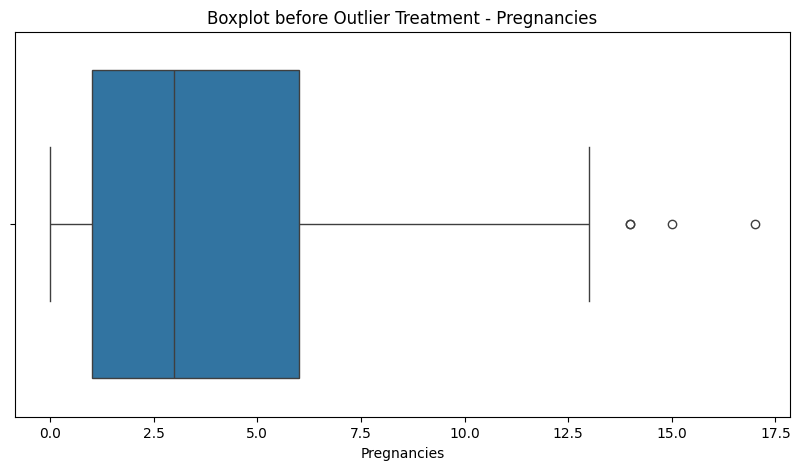

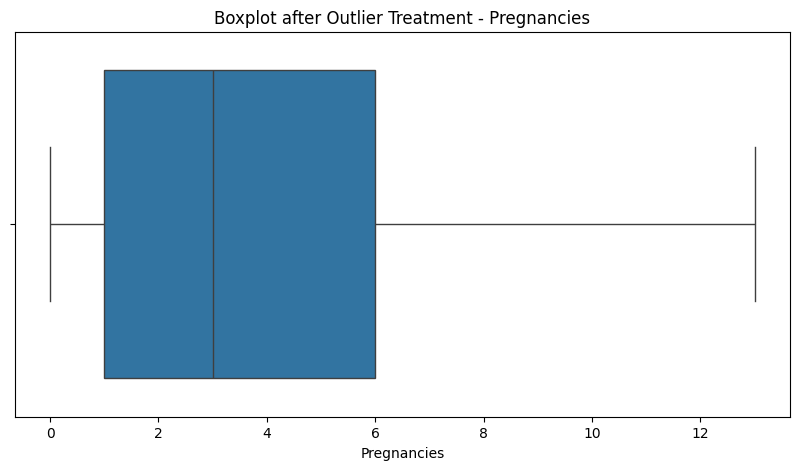

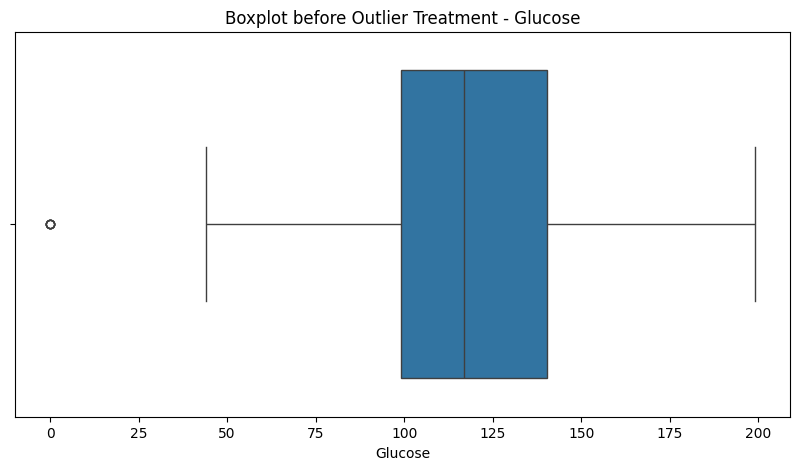

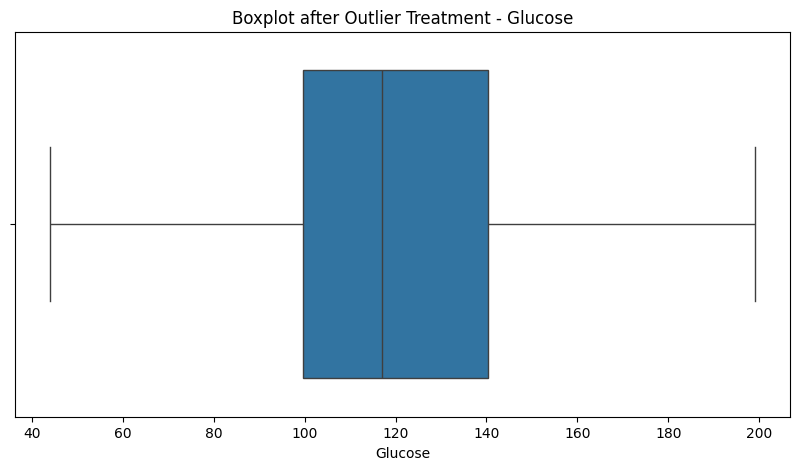

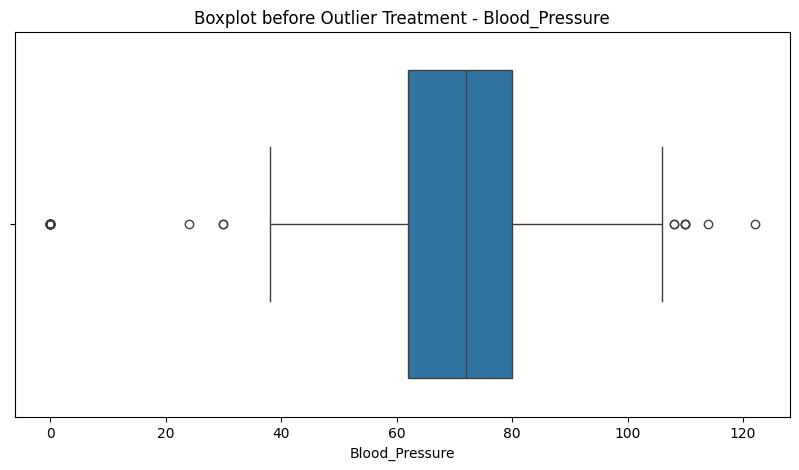

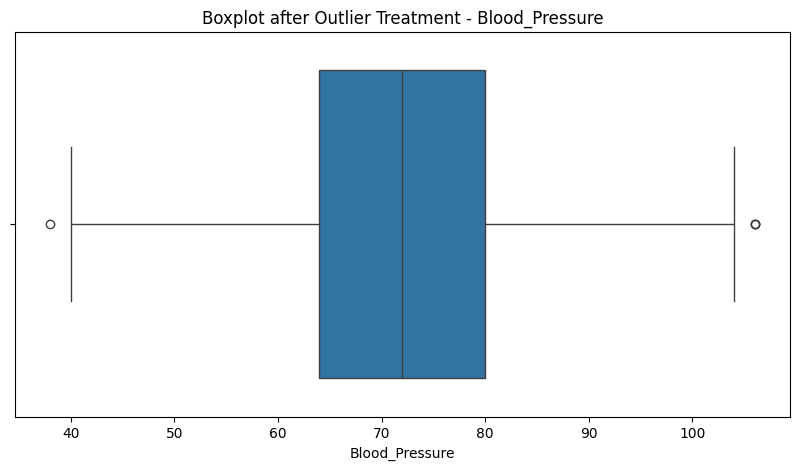

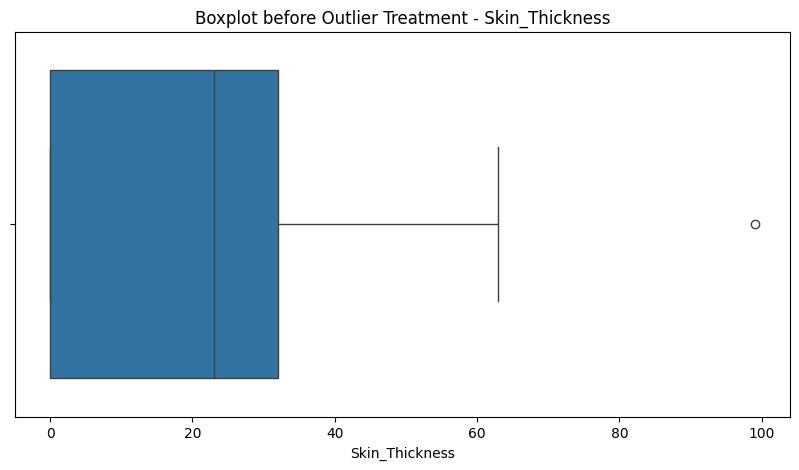

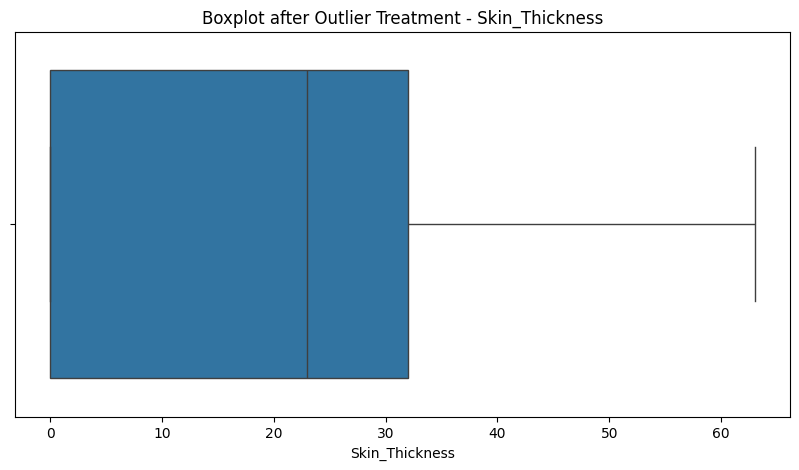

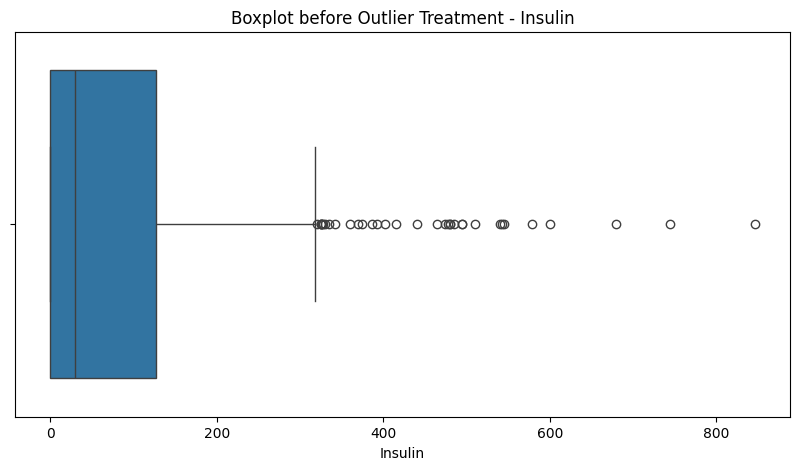

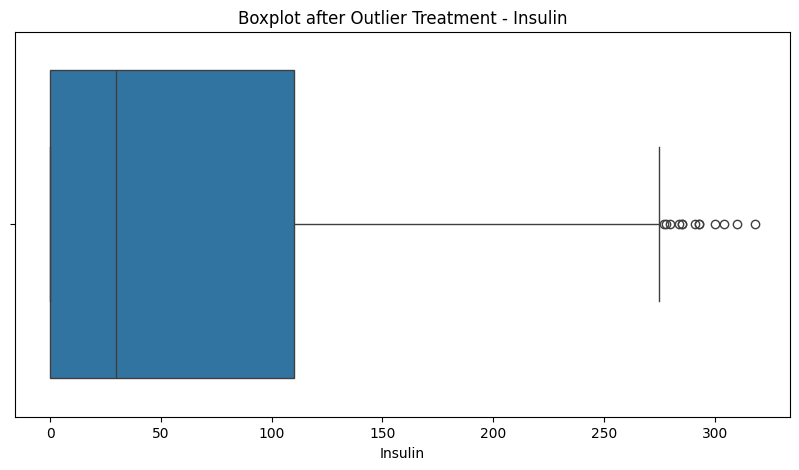

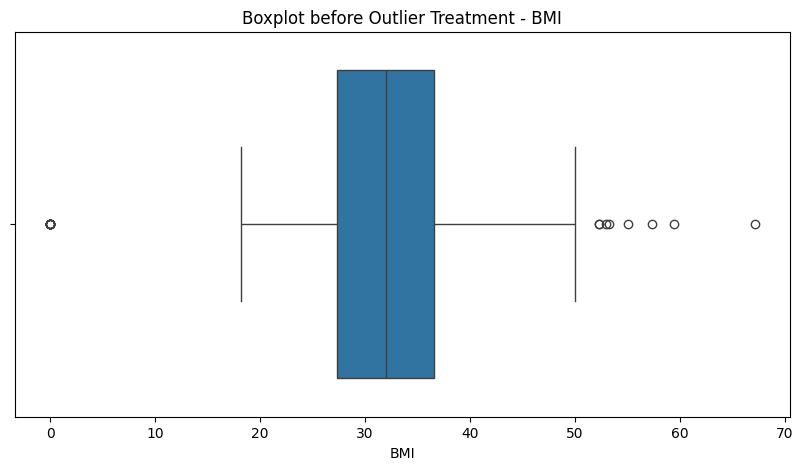

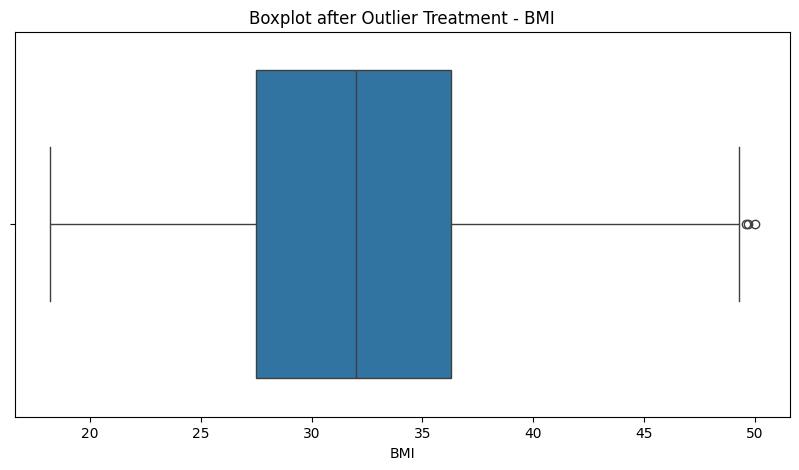

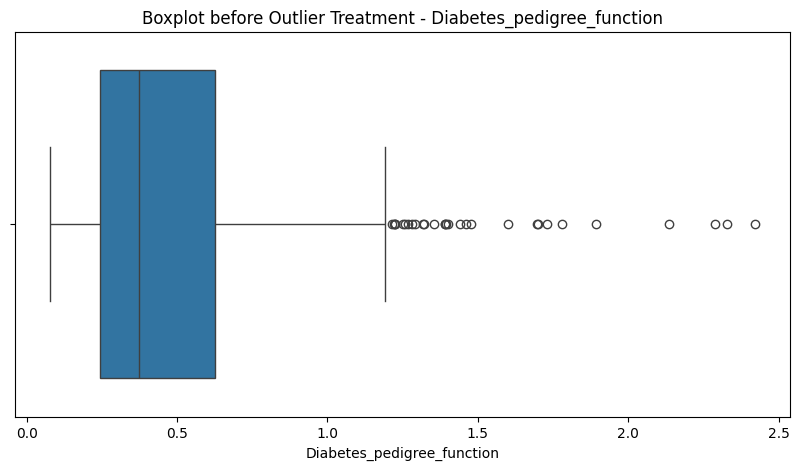

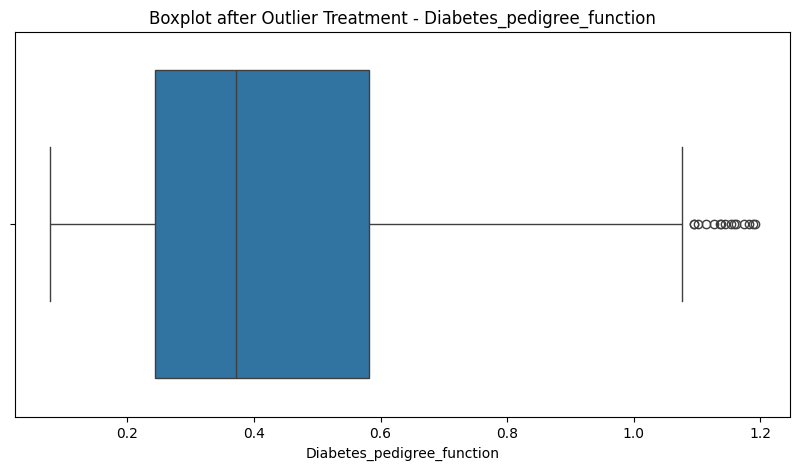

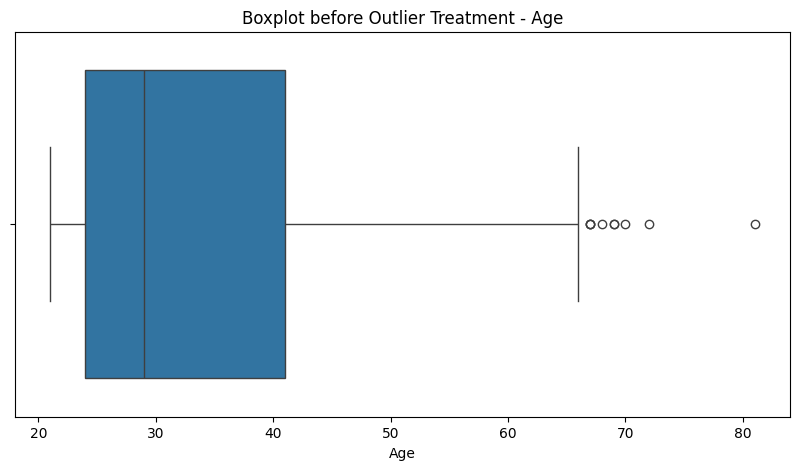

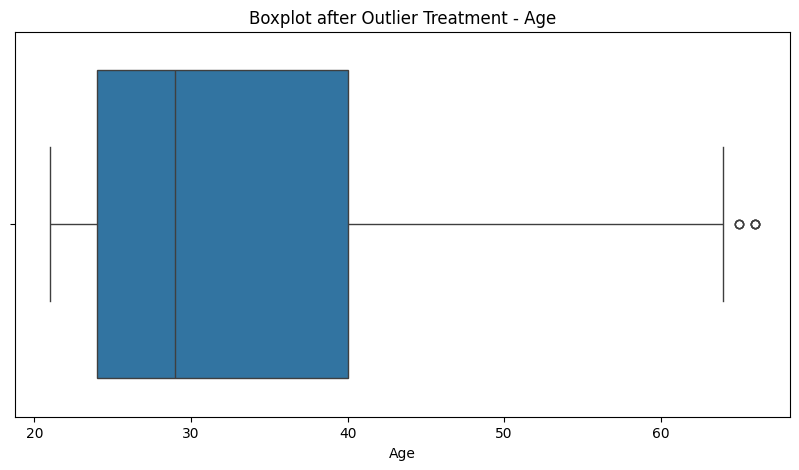

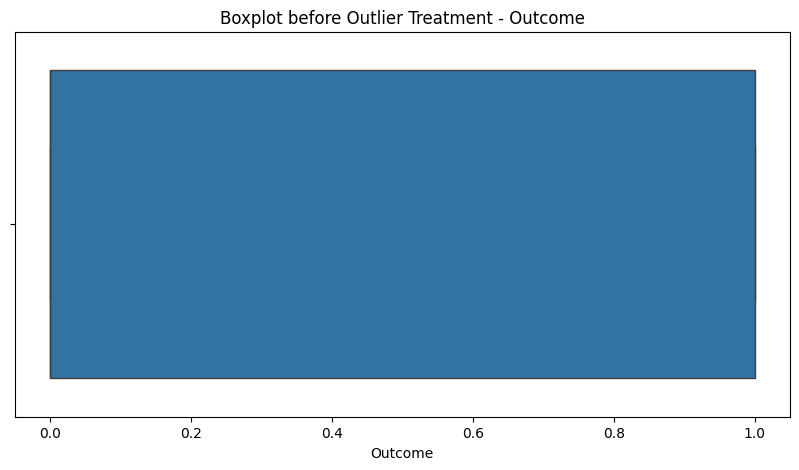

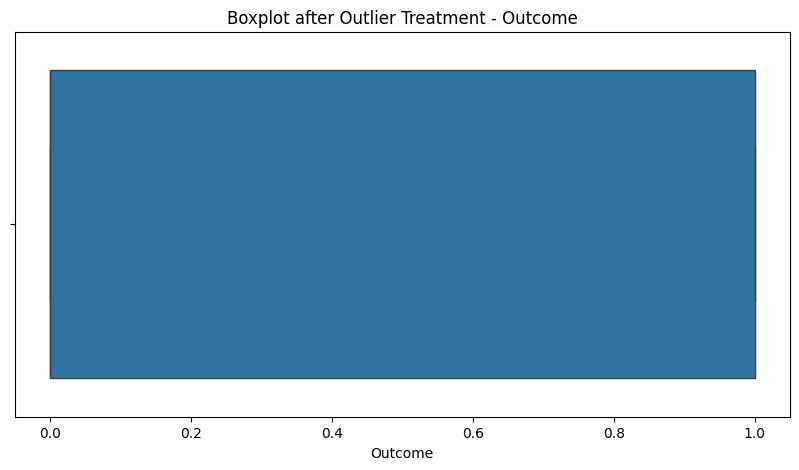

In [ ]:
def outlier_treatment(df):
  for i in df.columns:
    print(f"Processing column: {i}")

    #Boxplot
    plt.figure(figsize=(10,5))
    sns.boxplot(x = df[i])
    plt.title(f"Boxplot before Outlier Treatment - {i}")

    #Calculating IQR and Lower and Upper Bound
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    #Replacing the outliers with median
    df[i] = np.where(df[i]>upper_bound , df[i].median(), df[i])
    df[i] = np.where(df[i]<lower_bound , df[i].median(), df[i])
    # df[column] = df[column].apply(
    #         lambda x: median_value if x < lower_bound or x > upper_bound else x
    #     )

    #Boxplot after Outlier Treatmeant
    plt.figure(figsize=(10,5))
    sns.boxplot(x = df[i])
    plt.title(f"Boxplot after Outlier Treatment - {i}")

  return df


outlier_treatment(df)

##EDA

In [ ]:
df.describe()

Pregnancies     Glucose  Blood_Pressure  Skin_Thickness     Insulin  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.782552  121.656250       72.196615       20.437500   60.919271   
std       3.270644   30.438286       11.146723       15.698554   77.635666   
min       0.000000   44.000000       38.000000        0.000000    0.000000   
25%       1.000000   99.750000       64.000000        0.000000    0.000000   
50%       3.000000  117.000000       72.000000       23.000000   29.750000   
75%       6.000000  140.250000       80.000000       32.000000  110.000000   
max      13.000000  199.000000      106.000000       63.000000  318.000000   

              BMI  Diabetes_pedigree_function         Age     Outcome  
count  768.000000                  768.000000  768.000000  768.000000  
mean    32.198958                    0.427667   32.760417    0.348958  
std      6.410558                    0.245162   11.055385    0.476951  
min     18.200000                    0.078000   21.000000    0.000000  
25%     27.500000                    0.243750   24.000000    0.000000  
50%     32.000000                    0.371750   29.000000    0.000000  
75%     36.300000                    0.582250   40.000000    1.000000  
max     50.000000                    1.191000   66.000000    1.000000

###Univariate analysis

##Univariate Analysis of Numeric columns

<Axes: xlabel='Pregnancies', ylabel='count'>

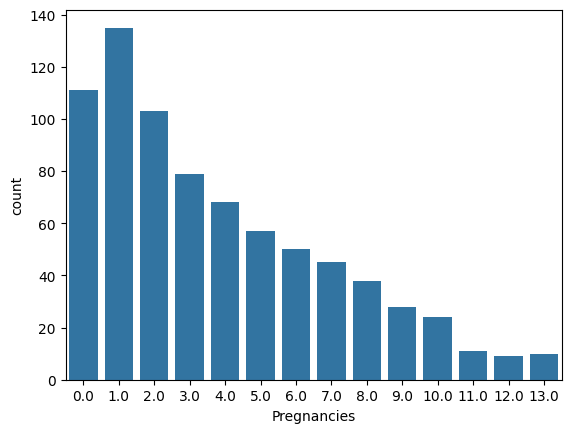

In [ ]:
sns.countplot(x = df['Pregnancies'])

<Axes: xlabel='Age', ylabel='count'>

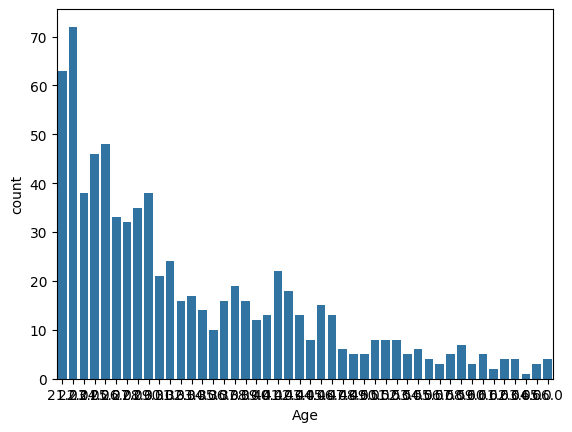

In [ ]:
sns.countplot(x = df['Age'])

<Axes: xlabel='Glucose', ylabel='Count'>

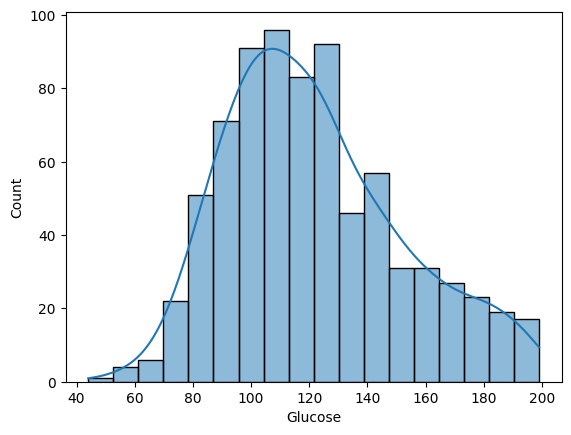

In [ ]:
sns.histplot(x = df['Glucose'], kde = True)

<Axes: xlabel='Blood_Pressure', ylabel='Count'>

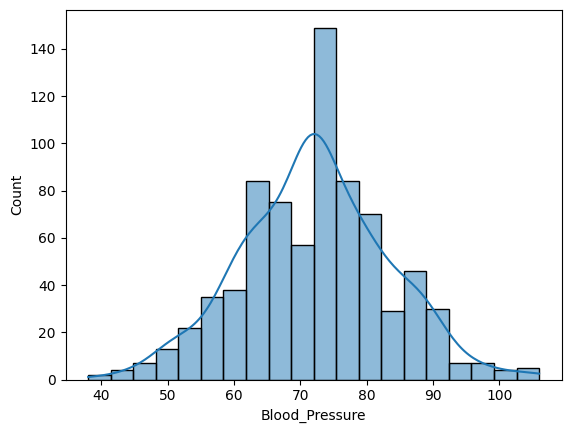

In [ ]:
sns.histplot(data = df , x = 'Blood_Pressure', kde = True)

<Axes: xlabel='BMI', ylabel='Count'>

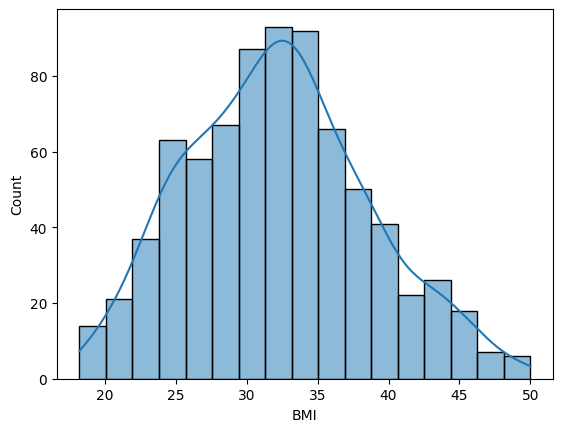

In [ ]:
sns.histplot(data = df , x = 'BMI', kde = True)

##Bi-Variate Analysis

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_pedigree_function', 'Age', 'Outcome'],
      dtype='object')

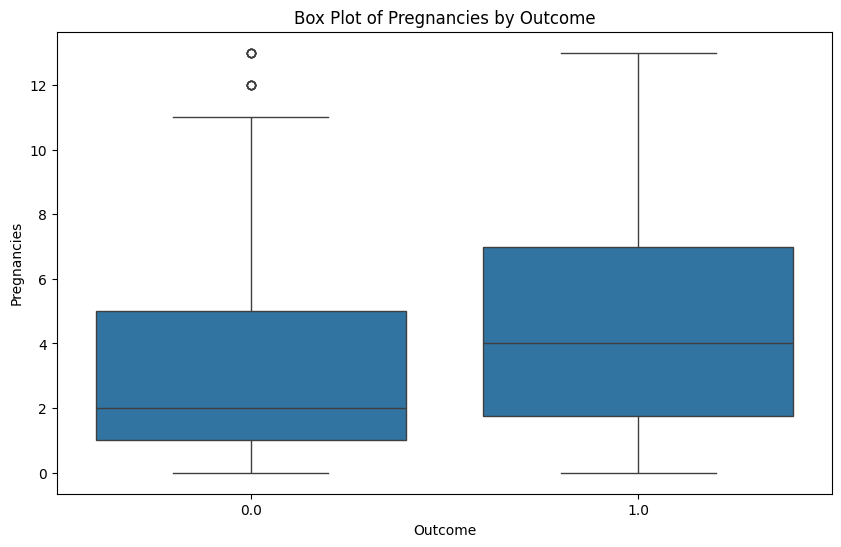

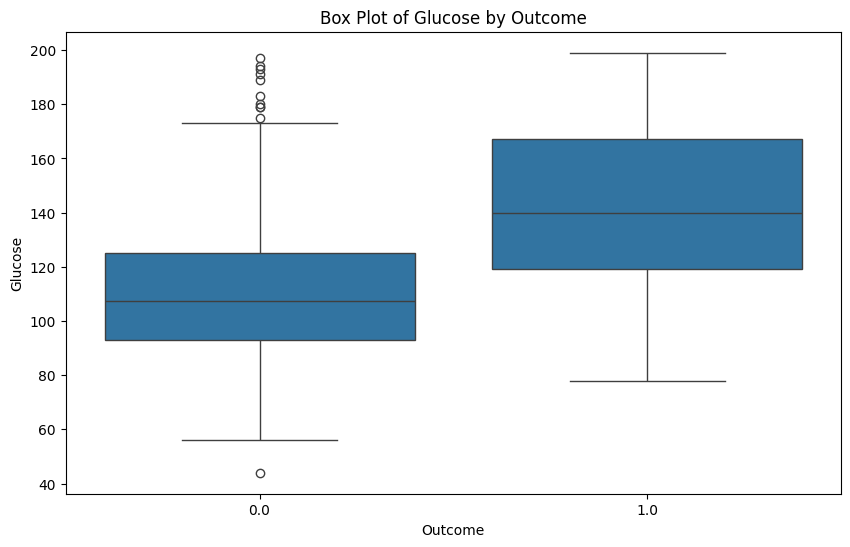

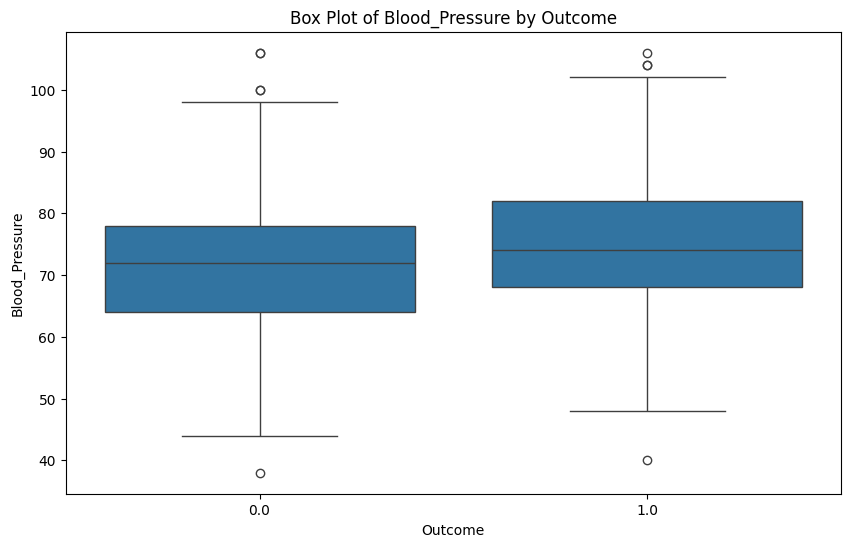

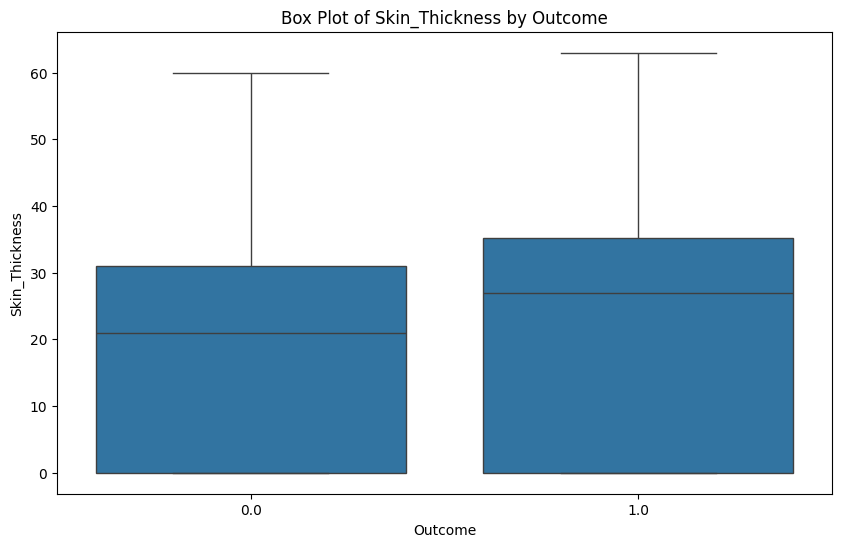

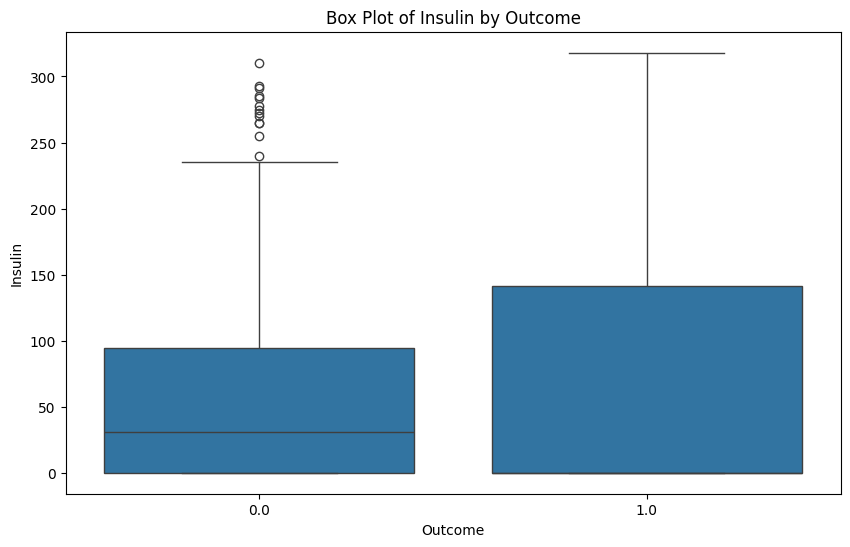

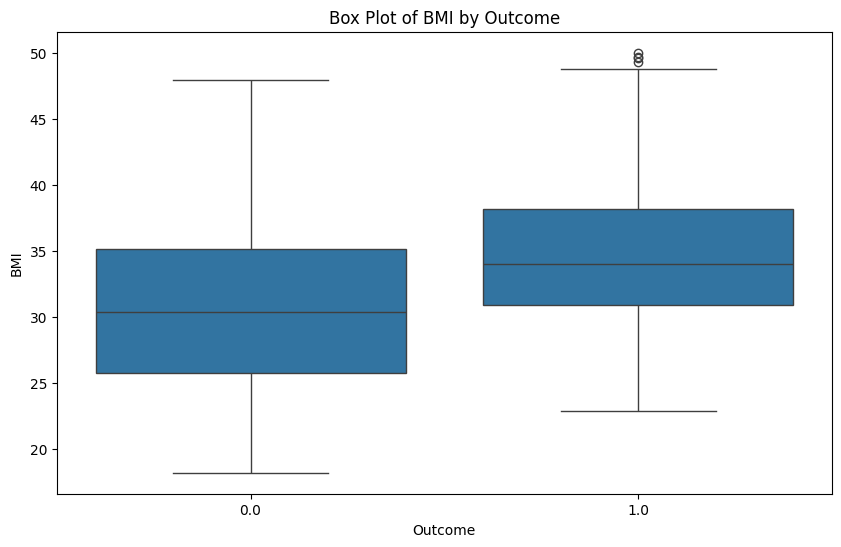

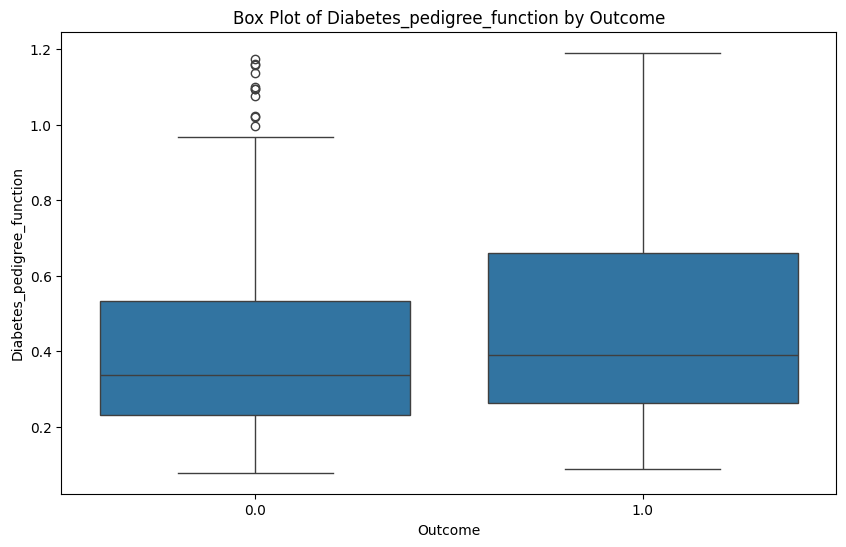

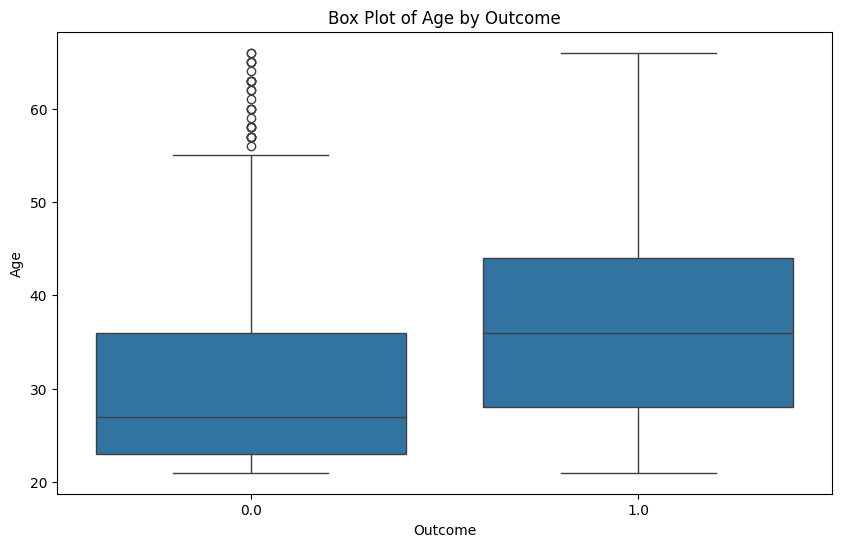

In [ ]:
#BoxPlot for each numerical column
numerical_columns = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_pedigree_function', 'Age']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Box Plot of {column} by Outcome')

Text(0, 0.5, 'BMI')

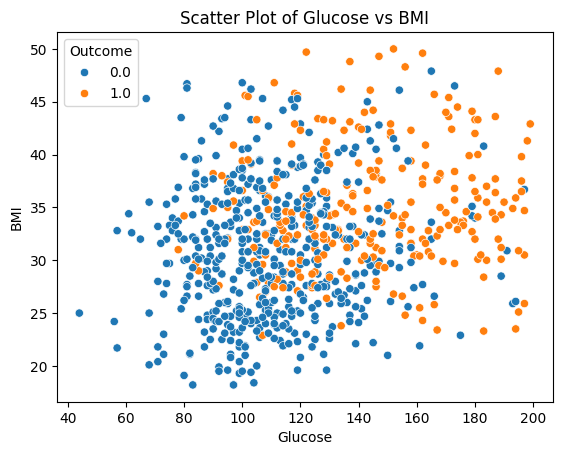

In [ ]:
#scatter plot
sns.scatterplot(data = df , x = 'Glucose' , y = 'BMI', hue = 'Outcome')
plt.title('Scatter Plot of Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')

Text(0, 0.5, 'Age')

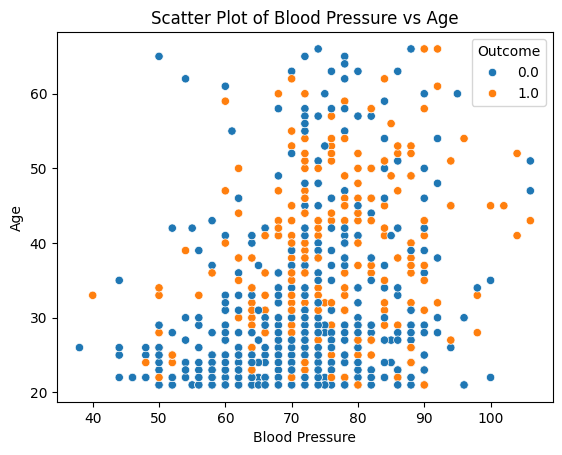

In [ ]:
sns.scatterplot(data = df , x = 'Blood_Pressure' , y = 'Age', hue = 'Outcome')
plt.title('Scatter Plot of Blood Pressure vs Age')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')

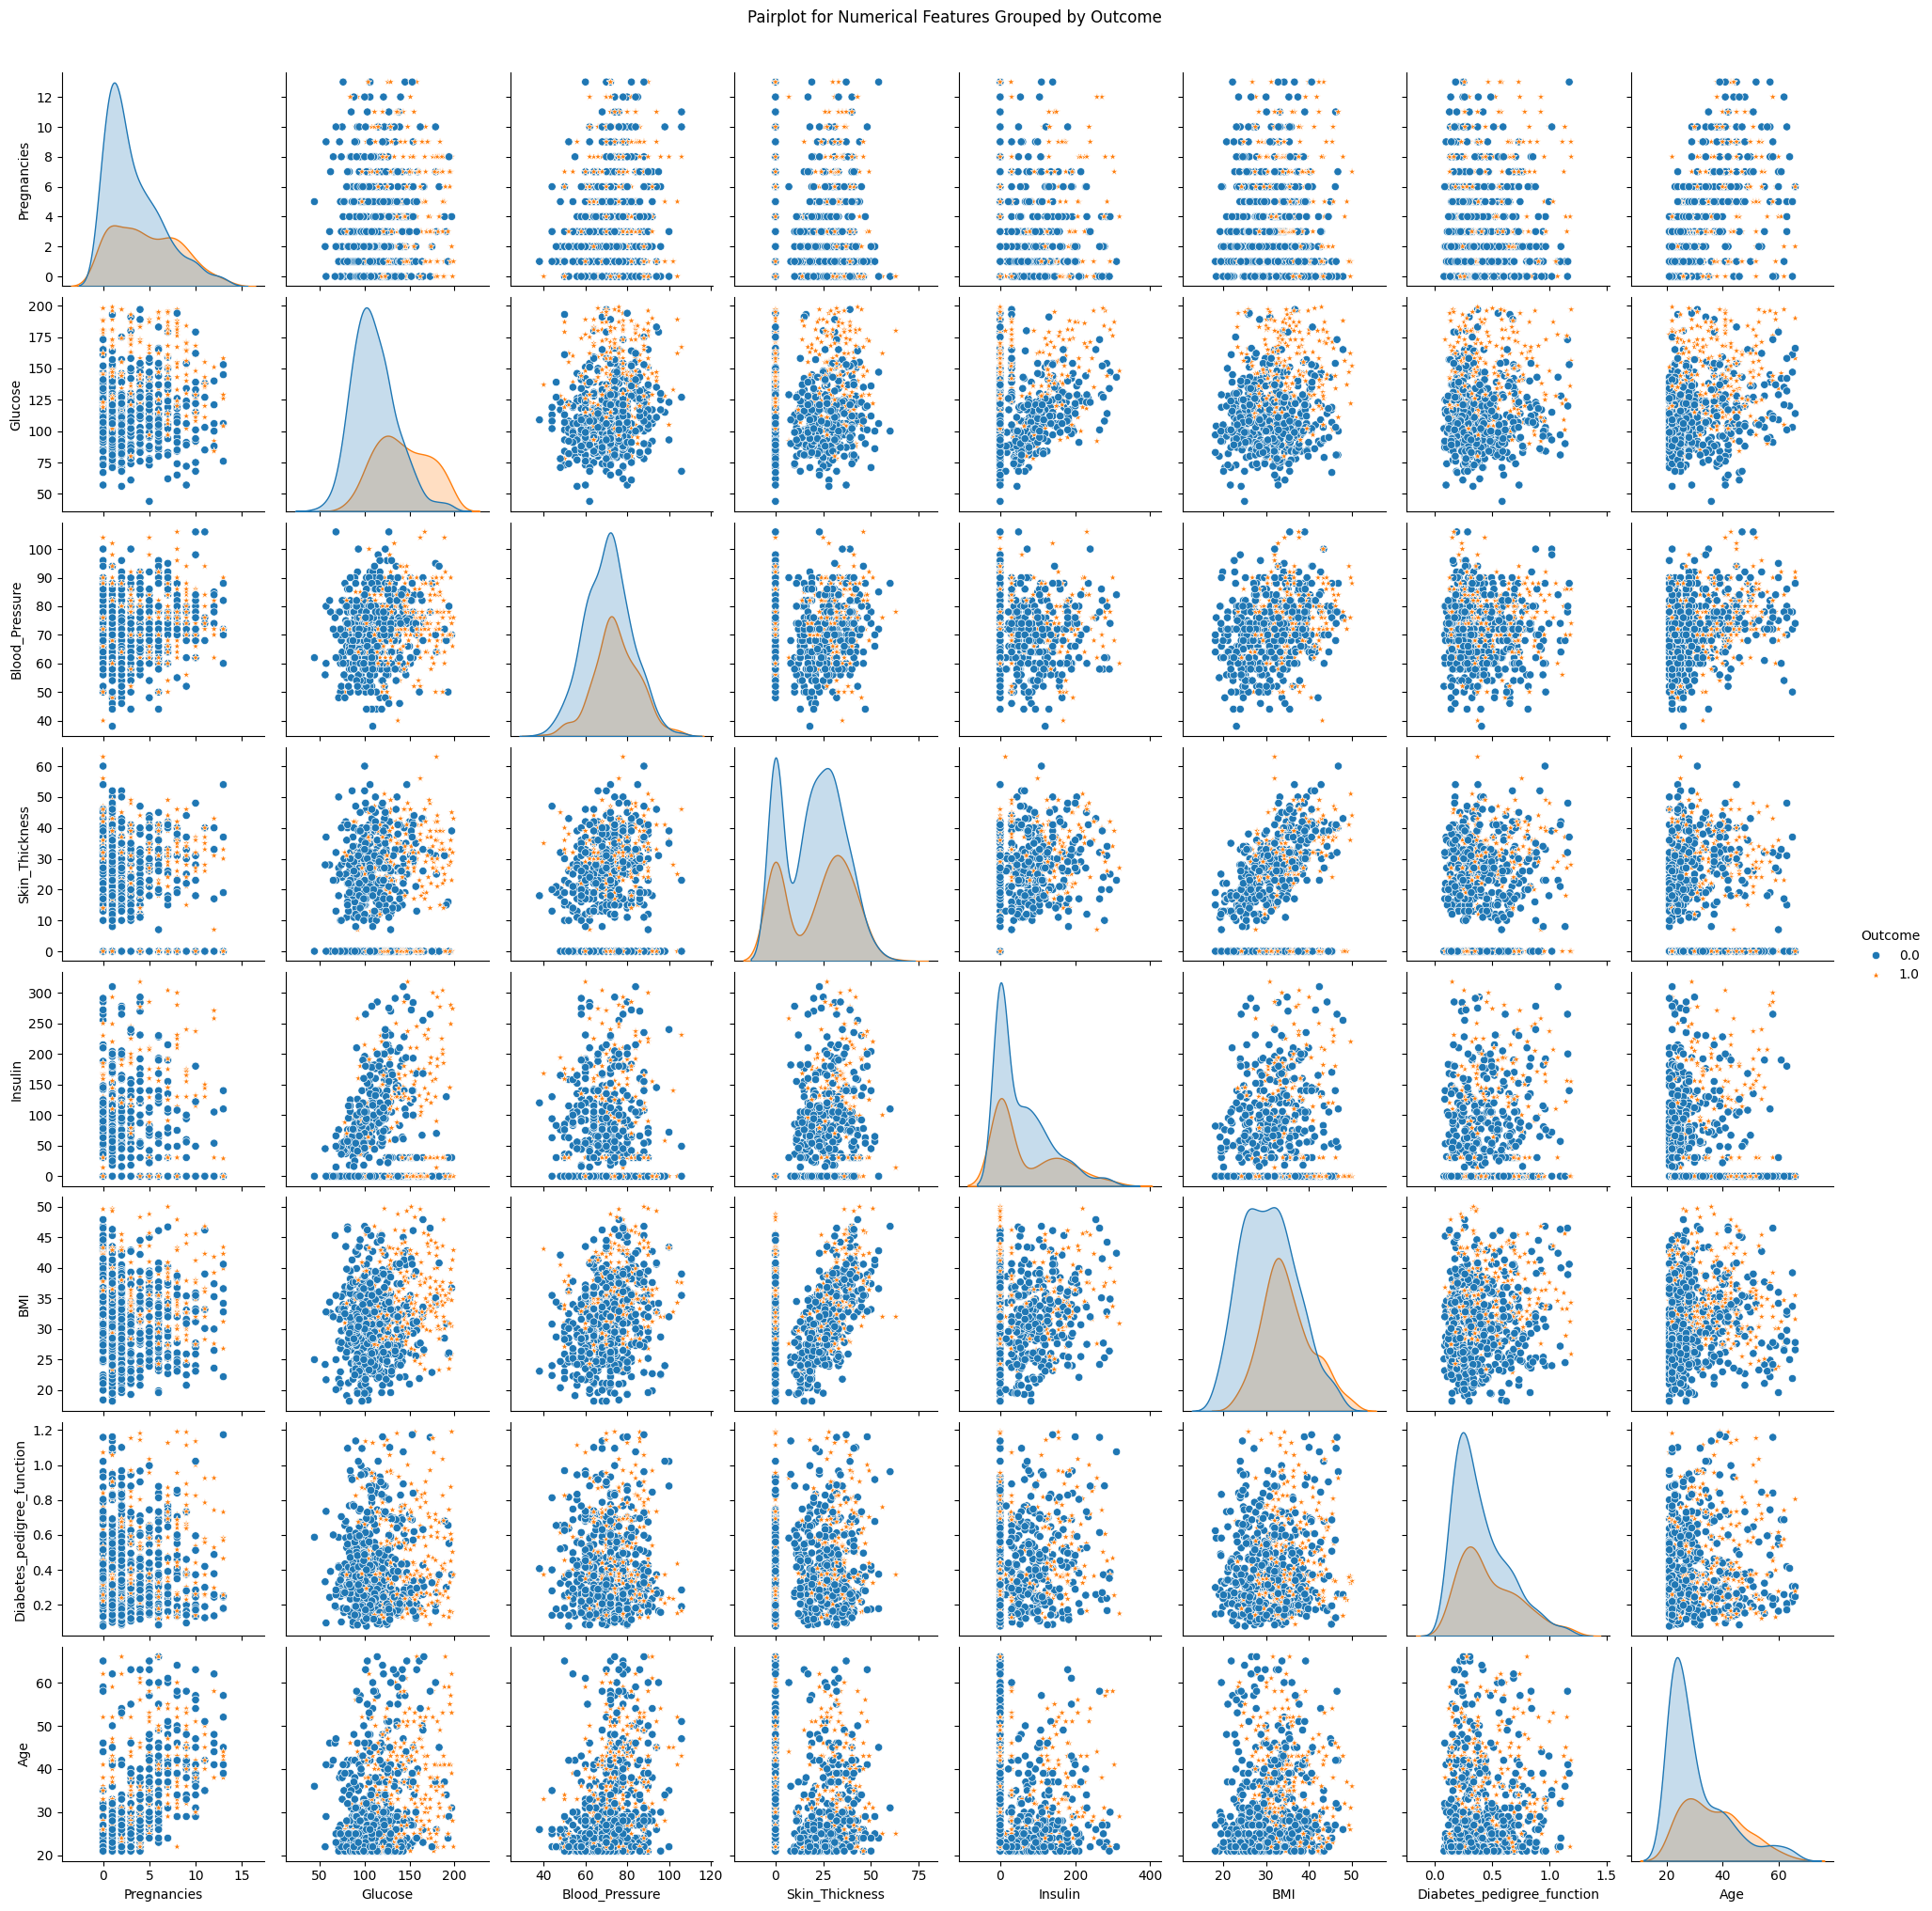

In [ ]:
#seaborn.pairplot() is used to visualize pairwise relationships in a dataset.
#It plots a grid of scatter plots for each pair of numerical columns, along with histograms (or KDE plots) on the diagonals.
sns.pairplot(data = df, vars = numerical_columns, hue = 'Outcome', markers = ["o", "*"])
plt.suptitle("Pairplot for Numerical Features Grouped by Outcome", y=1.02)
plt.show()

In [ ]:
df.groupby('Outcome') [numerical_columns].mean().reset_index()

Outcome  Pregnancies     Glucose  Blood_Pressure  Skin_Thickness  \
0      0.0     3.298000  110.682000       70.852000       19.664000   
1      1.0     4.686567  142.130597       74.705224       21.880597   

     Insulin        BMI  Diabetes_pedigree_function        Age  
0  56.485000  30.789000                    0.400404  30.610000  
1  69.192164  34.829478                    0.478532  36.772388

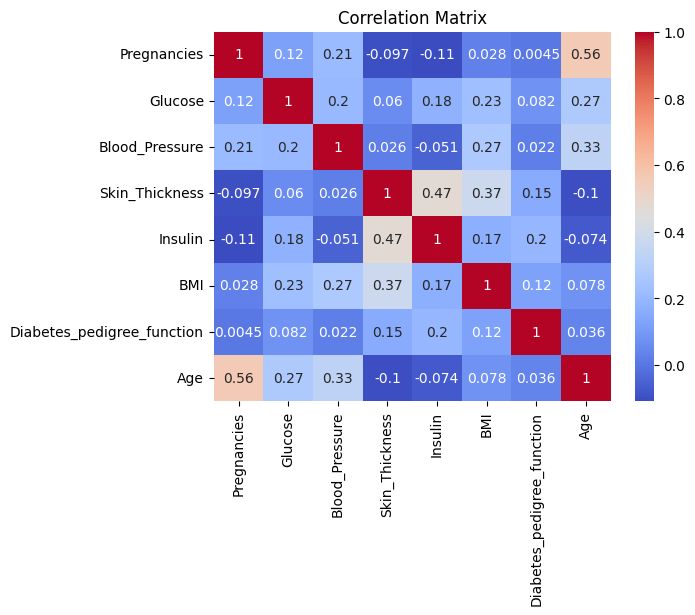

In [ ]:
#correlation matrix for numerical columns
corr_matrix = df[numerical_columns].corr()

#heatmap for the same
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

##MODEL BUIDLING

In [ ]:
X = df.drop('Outcome', axis = 1)
Y = df[['Outcome']]

### Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.head()

Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
762          9.0     89.0            62.0             0.0      0.0  22.5   
127          1.0    118.0            58.0            36.0     94.0  33.3   
564          0.0     91.0            80.0             0.0      0.0  32.4   
375         12.0    140.0            82.0            43.0     30.5  39.2   
663          9.0    145.0            80.0            46.0    130.0  37.9   

     Diabetes_pedigree_function   Age  
762                       0.142  33.0  
127                       0.261  23.0  
564                       0.601  27.0  
375                       0.528  58.0  
663                       0.637  40.0

In [ ]:
Y_train.head()

Outcome
762      0.0
127      0.0
564      0.0
375      1.0
663      1.0

In [ ]:
X_test.head()

Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
661          1.0    199.0            76.0            43.0      0.0  42.9   
122          2.0    107.0            74.0            30.0    100.0  33.6   
113          4.0     76.0            62.0             0.0      0.0  34.0   
14           5.0    166.0            72.0            19.0    175.0  25.8   
529          0.0    111.0            65.0             0.0      0.0  24.6   

     Diabetes_pedigree_function   Age  
661                      0.3725  22.0  
122                      0.4040  23.0  
113                      0.3910  25.0  
14                       0.5870  51.0  
529                      0.6600  31.0

In [ ]:
Y_test.head()

Outcome
661      1.0
122      0.0
113      0.0
14       1.0
529      0.0

##Model Training

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, auc

In [ ]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred_log = log_model.predict(X_test)
print(y_pred_log)

[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


###Evaluation of Model

In [ ]:
#Evaluation metrics
accuracy_metrix = accuracy_score(Y_test, y_pred_log)
precision_metrix = precision_score(Y_test, y_pred_log)
recall_metrix = recall_score(Y_test, y_pred_log)
confusion_metrix = confusion_matrix(Y_test, y_pred_log)

print("Accuracy Matrix",accuracy_metrix)
print("Precision Matrix", precision_metrix)
print("Recall Matrix",recall_metrix)
print("Confusion Matrix \n",confusion_metrix)

Accuracy Matrix 0.7604166666666666
Precision Matrix 0.66
Recall Matrix 0.532258064516129
Confusion Matrix 
 [[113  17]
 [ 29  33]]


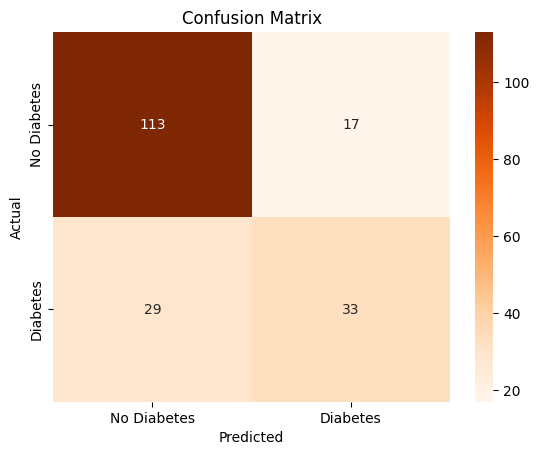

In [ ]:
#plot confusion matrix on heatmap
sns.heatmap(confusion_metrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

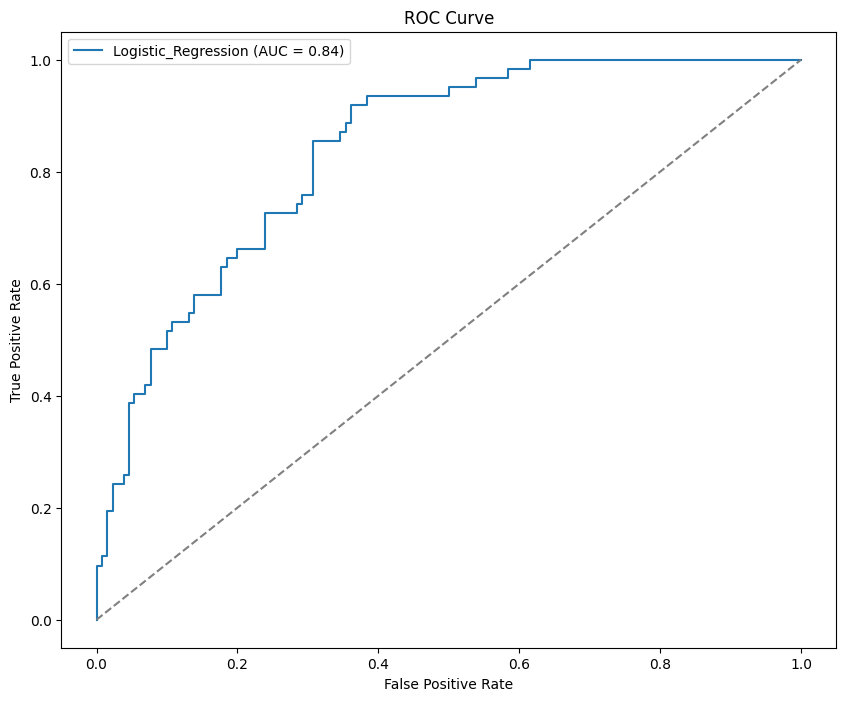

In [ ]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, log_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr) #area under curve

#plotting the roc curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label = f'Logistic_Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color = 'grey', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Conclusion



1.   The AUC of the model is 0.84 that means 84% probability of correctly distinguishing between positive and negative classes.
2.   The curve goes up fast, which means the model catches most of the positives without making too many mistakes.
3.  This model is reliable for binary classification tasks where balancing false positives and false negatives matters

